### Uzawa

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg
from scipy.sparse.linalg import aslinearoperator
from numpy.linalg import solve 

def uzawa(B, C, b, c, x, lmbda, tau):
    res_list = []
    its = 0
    while True:
        res = norm(B.dot(x) + lmbda.dot(C) +b) + norm(C.dot(x) + c)
        #print(res)
        
        if res < 1e-8:
            break
        x = - solve(B, lmbda.dot(C) + b)
        lmbda = lmbda + tau * (C.dot(x) + c)
        its += 1
        res_list.append(res)
    return {"x": x, "lmbda": lmbda, "res_list": res_list, "its": its}


def run_test():
    B = np.array([[3, 2, 1.], [2, 2, 0], [1, 0, 2]])
    C = np.array([[1, -2., 1], [-1, 1, -1]])
    b = np.zeros(3)
    c = np.array([3., -2.])

    x0 = np.array([0., 0., 0.])  # Startwert
    lmbda0 = np.array([0., 0.])  # Startwert
    tau = 0.05

    sol = uzawa(B, C, b, c, x0, lmbda0, tau)
    
    print(sol["x"])
    print(sol["its"])
    plt.plot(sol["res_list"])
    plt.yscale("log")
    plt.show()

[-1.00000000e+00  1.00000001e+00  2.33795119e-08]
4524


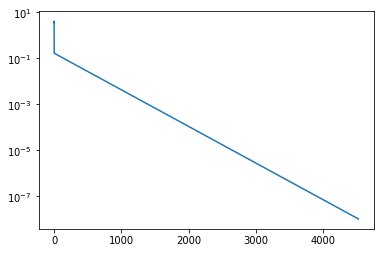

In [2]:
run_test()

In [ ]:
run_test()